# Binary Classification using Deep Neural Network.

Implementing Binary Classification using Deep Neural Network to classify movie reviews into "Possitive" and "Negative" reviews, basedon the tet content of the reviews using IMDB dataset.

Dataset Link: https://www.kaggle.com/datasets/ashirwadsangwan/imdb-dataset

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Load the dataset from a local CSV file
data = pd.read_csv('Datasets/IMDB.csv')

In [3]:
# Convert labels to numeric format
label_map = {'positive': 1, 'negative': 0}
data['sentiment'] = data['sentiment'].map(label_map)

In [4]:
# Extract the text content and labels
reviews = data['review'].values
labels = data['sentiment'].values

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.2, random_state=42)

In [6]:
# Tokenize the text and convert to sequences
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [7]:
# Pad the sequences to a fixed length
max_len = 200  # Limit the length of each review to 200 words
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len)

In [8]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 128, input_length=max_len),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# Train the model
history = model.fit(X_train_padded, y_train, epochs=10, batch_size=128, validation_data=(X_test_padded, y_test))

Epoch 1/10
313/313 [==============================] - 8s 23ms/step - loss: 0.4361 - accuracy: 0.8099 - val_loss: 0.2763 - val_accuracy: 0.8856
Epoch 2/10
313/313 [==============================] - 9s 27ms/step - loss: 0.2376 - accuracy: 0.9066 - val_loss: 0.2624 - val_accuracy: 0.8882
Epoch 3/10
313/313 [==============================] - 9s 27ms/step - loss: 0.1989 - accuracy: 0.9240 - val_loss: 0.2698 - val_accuracy: 0.8900
Epoch 4/10
313/313 [==============================] - 9s 28ms/step - loss: 0.1772 - accuracy: 0.9327 - val_loss: 0.2871 - val_accuracy: 0.8838
Epoch 5/10
313/313 [==============================] - 9s 27ms/step - loss: 0.1611 - accuracy: 0.9404 - val_loss: 0.3145 - val_accuracy: 0.8791
Epoch 6/10
313/313 [==============================] - 8s 26ms/step - loss: 0.1495 - accuracy: 0.9447 - val_loss: 0.3291 - val_accuracy: 0.8765
Epoch 7/10
313/313 [==============================] - 7s 22ms/step - loss: 0.1395 - accuracy: 0.9493 - val_loss: 0.3551 - val_accuracy: 0.8733

In [11]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.4250 - accuracy: 0.8661
Test Loss: 0.4250330924987793
Test Accuracy: 0.866100013256073


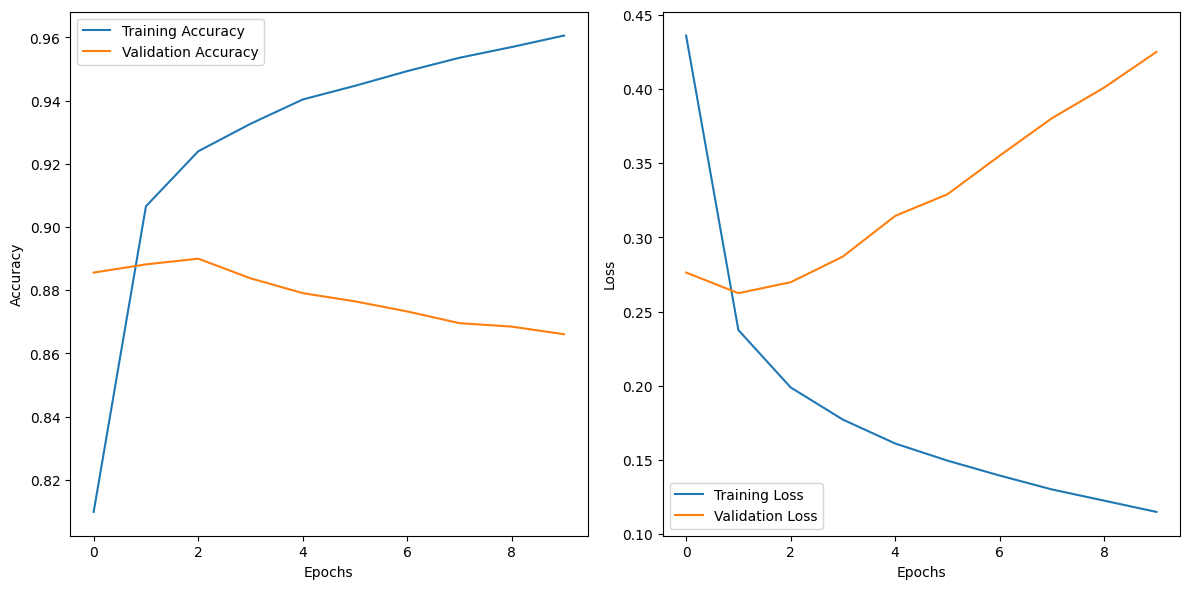

In [12]:

# Plot the accuracy and loss curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
# #Binary Classification:
# Binary classification is a machine learning task where the goal is to classify data into one of two possible classes. The classes are typically represented as positive (1) and negative (0) or as true and false. Binary classification algorithms are used when the target variable or dependent variable is binary in nature.

# Some popular algorithms for binary classification include:

# Logistic Regression
# Support Vector Machines (SVM)
# Decision Trees
# Random Forests
# Naive Bayes Classifier
# Neural Networks (with a binary output layer)
# Evaluation metrics commonly used for binary classification include accuracy, precision, recall, F1-score, and area under the ROC curve (AUC-ROC).

# Multiclass Classification:
# Multiclass classification is a machine learning task where the goal is to classify data into more than two classes. The classes can represent different categories or labels. Multiclass classification algorithms are used when the target variable has more than two possible values.

# Some popular algorithms for multiclass classification include:

# Logistic Regression (extended to handle multiple classes)
# Support Vector Machines (SVM)
# Decision Trees
# Random Forests
# Naive Bayes Classifier
# Neural Networks (with a softmax output layer)
# Evaluation metrics commonly used for multiclass classification include accuracy, precision, recall, F1-score, and confusion matrix.

# In multiclass classification, there are different strategies to handle the classification problem:

# One-vs-Rest (One-vs-All): This strategy involves training a separate binary classifier for each class, which determines whether an instance belongs to that class or the rest of the classes.
# One-vs-One: This strategy involves training a binary classifier for each pair of classes. During prediction, the class with the maximum number of votes is selected.
# Multinomial Logistic Regression: This is a direct extension of binary logistic regression to handle multiple classes.